In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading data from CSV files
cleaned_listings = pd.read_csv('/content/drive/MyDrive/cleaned_data/cleaned_listings_v2.csv')
cleaned_calendars = pd.read_csv('/content/drive/MyDrive/cleaned_data/cleaned_calendars_v2.csv')
daily_metrics = pd.read_csv('/content/drive/MyDrive/cleaned_data/daily_metrics.csv')

In [ ]:
#1) Viewing basic information for each dataset
print(cleaned_listings.info())
print(cleaned_calendars.info())
print(daily_metrics.info())

#2) Viewing basic descriptive statistics
print(cleaned_listings.describe())
print(cleaned_calendars.describe())
print(daily_metrics.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34734 entries, 0 to 34733
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      34734 non-null  int64  
 1   host_response_time      34734 non-null  object 
 2   host_is_superhost       34734 non-null  float64
 3   neighbourhood_cleansed  34734 non-null  object 
 4   latitude                34734 non-null  float64
 5   longitude               34734 non-null  float64
 6   property_type           34734 non-null  object 
 7   room_type               34734 non-null  object 
 8   accommodates            34734 non-null  int64  
 9   bathrooms               34734 non-null  float64
 10  bedrooms                34734 non-null  float64
 11  beds                    34734 non-null  float64
 12  price                   34734 non-null  float64
 13  review_scores_rating    34734 non-null  float64
 14  instant_bookable        34734 non-null



Analyze cleaned_listings

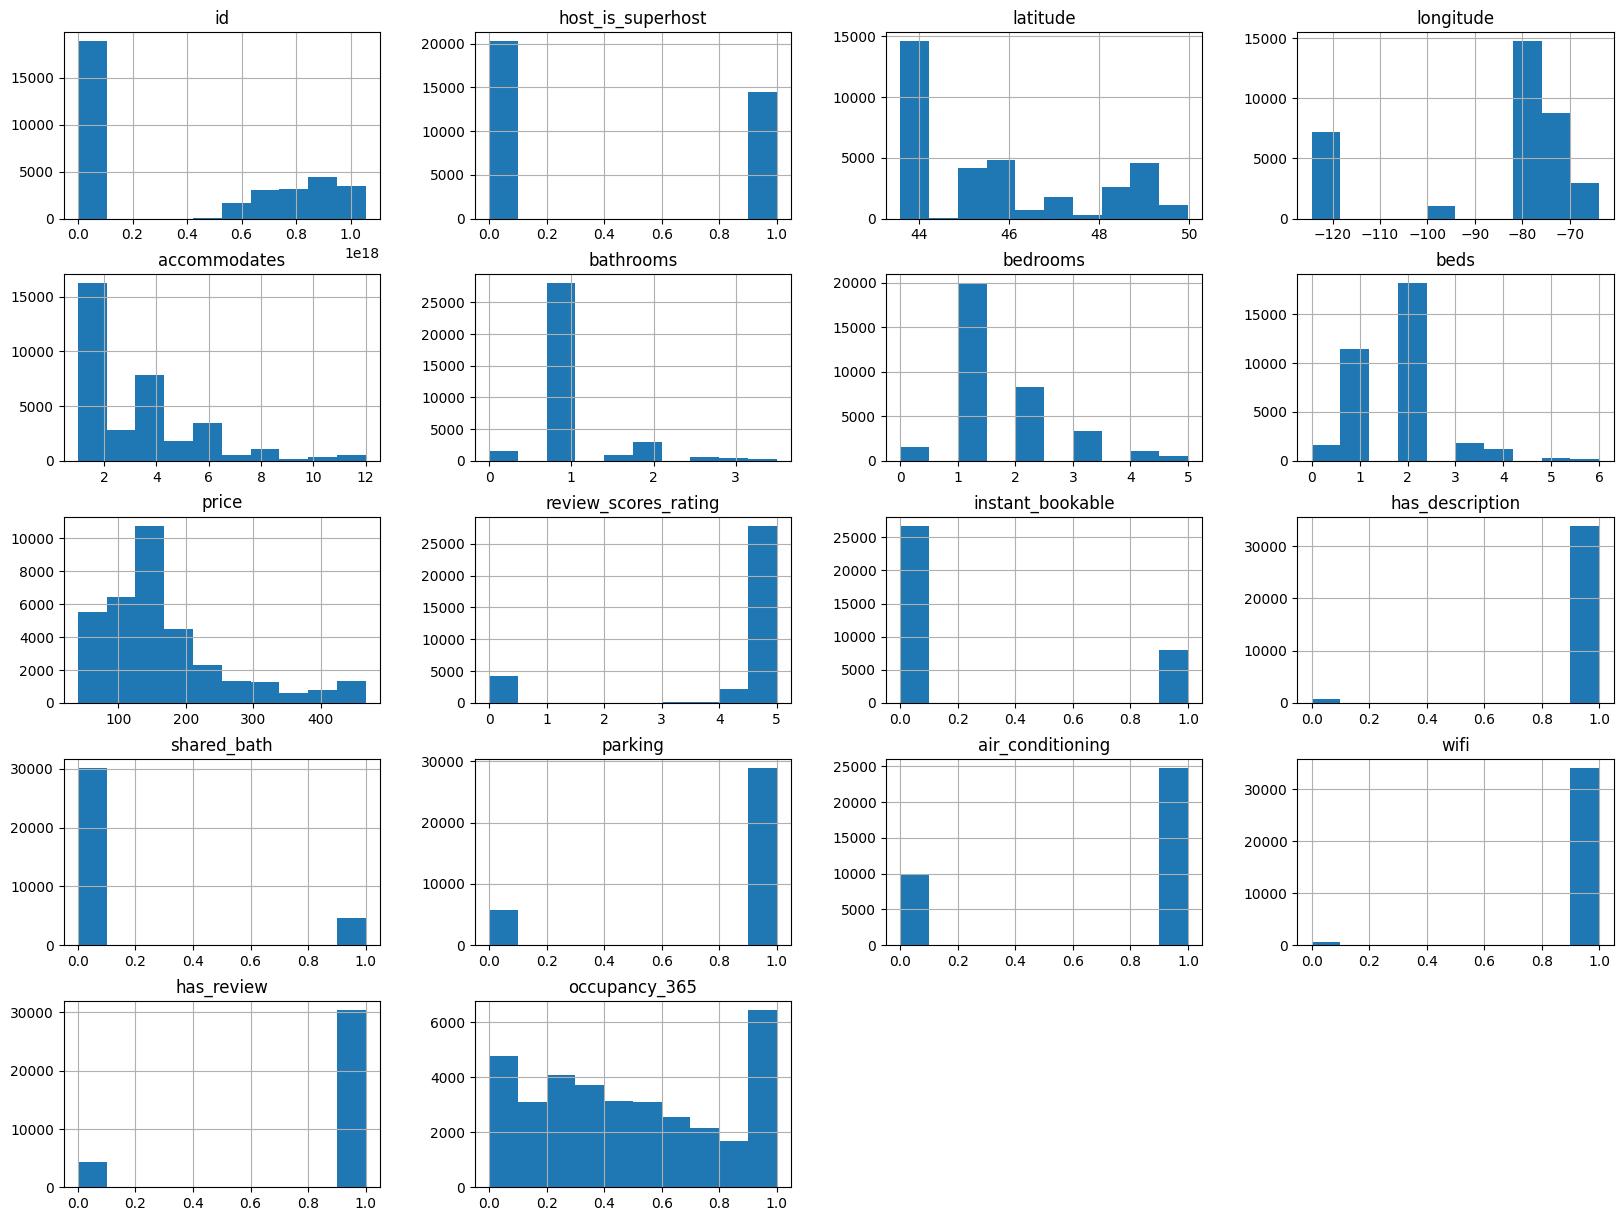

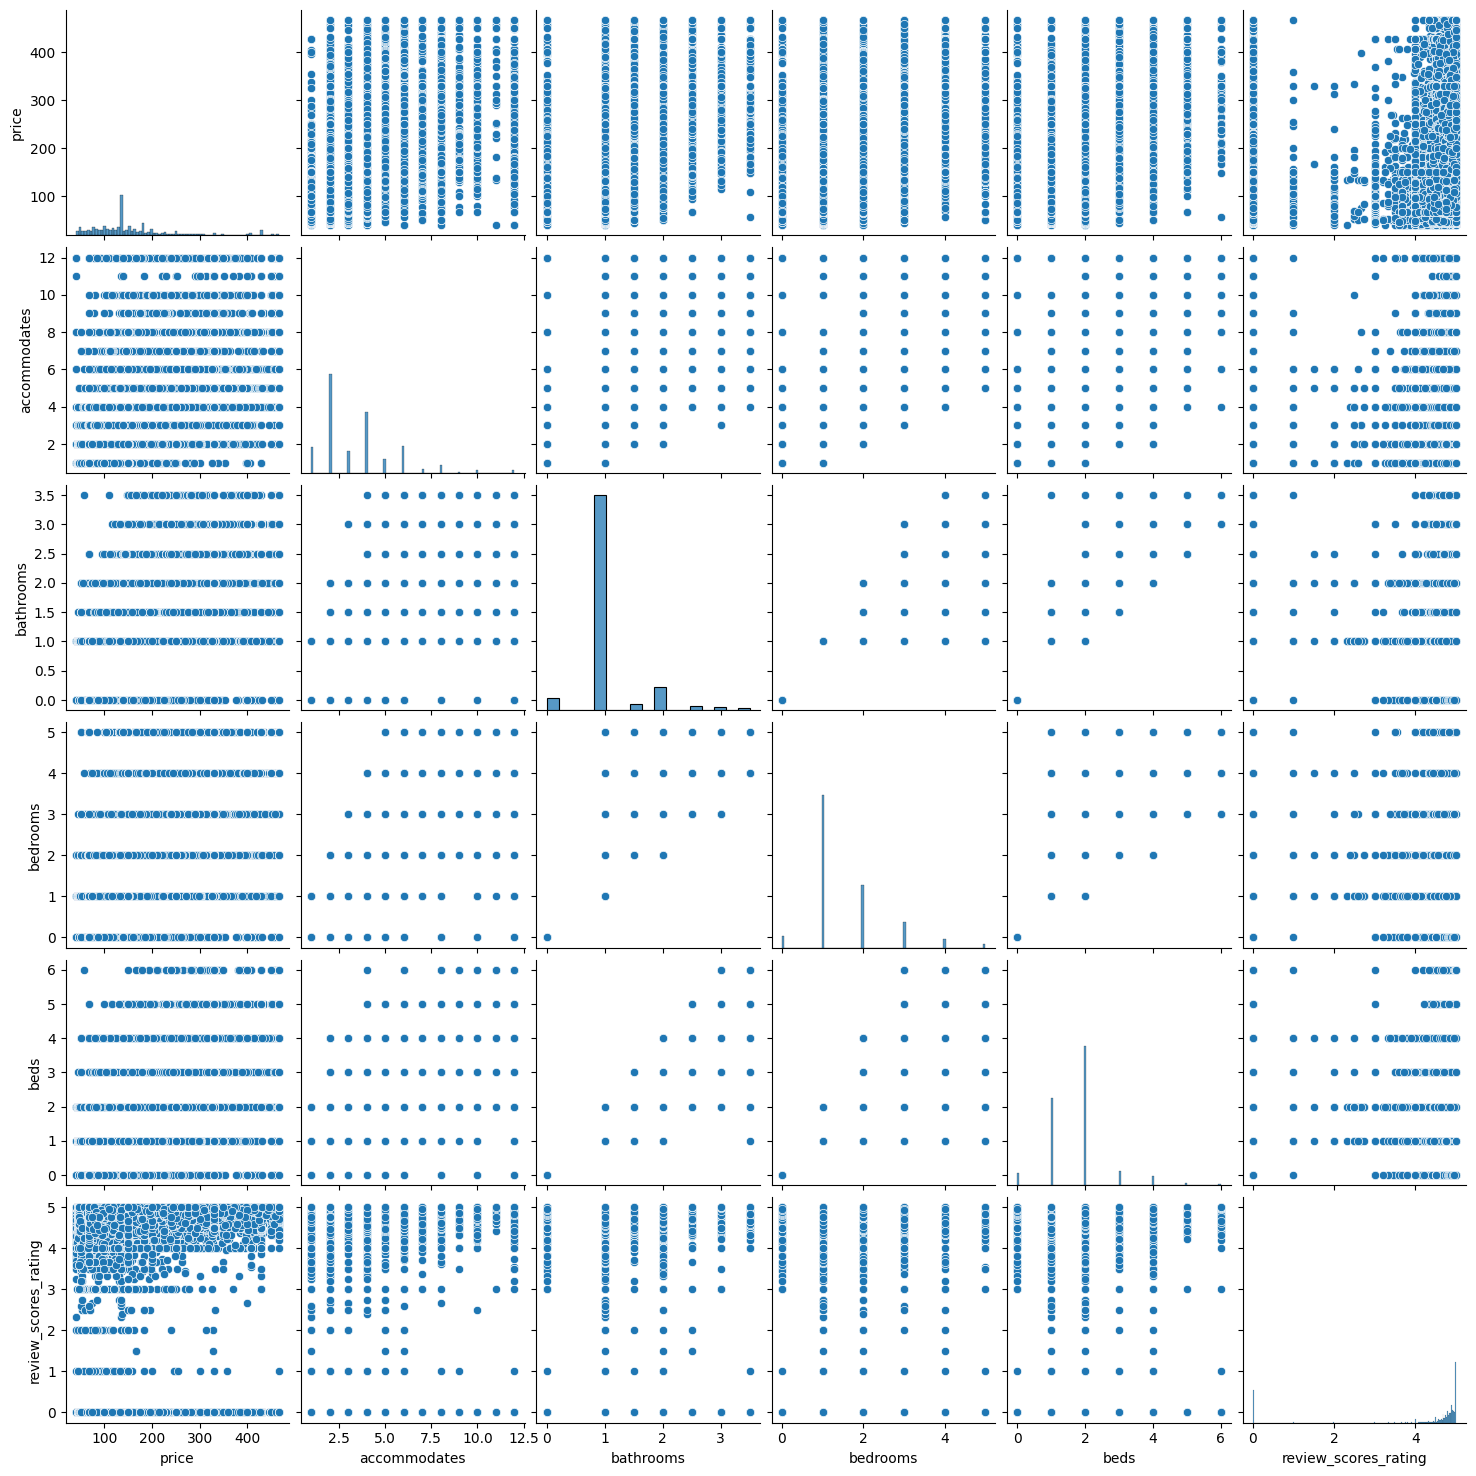

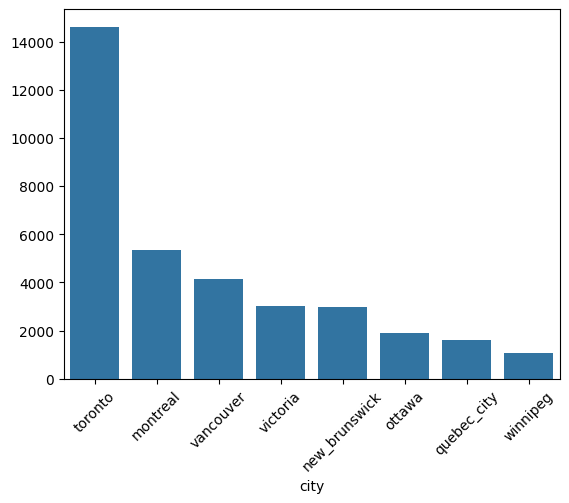

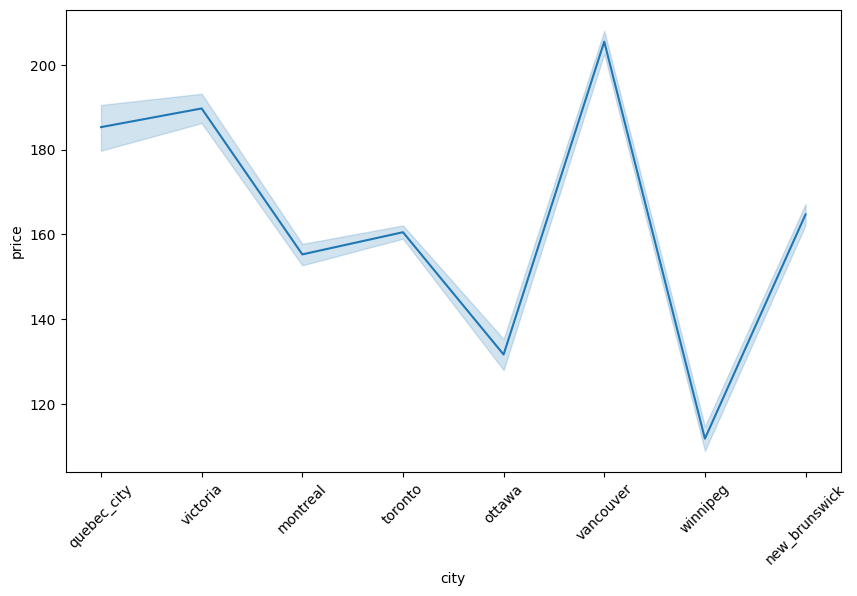

In [5]:
#1) Analyzing the distribution of variables
cleaned_listings.hist(figsize=(20, 15))
plt.show()

#2) Analyzing relationships between variables
sns.pairplot(cleaned_listings[['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']])
plt.show()

#3) Analyzing the number of listings per city
city_counts = cleaned_listings['city'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.xticks(rotation=45)
plt.show()

#4) Analyzing the avarage price per city (line chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x='city', y='price', data=cleaned_listings)
plt.xticks(rotation=45)
plt.show()

Analyzing cleaned_calendars

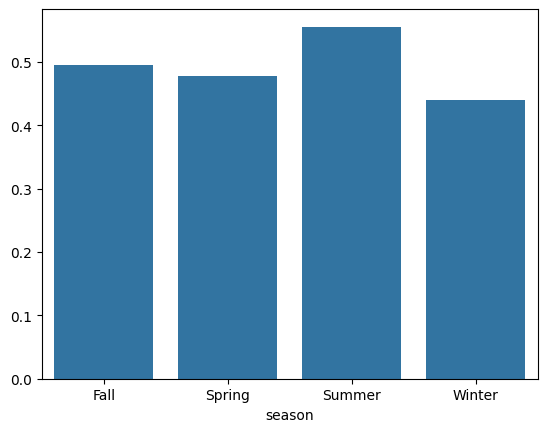

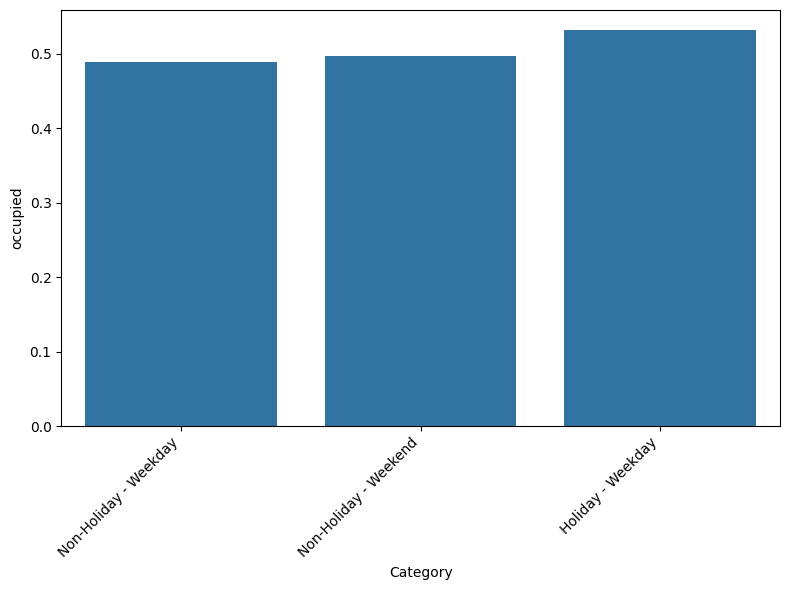

In [ ]:
#1) Analyzing occupancy rate by season
seasonal_occupancy = cleaned_calendars.groupby('season')['occupied'].mean()
sns.barplot(x=seasonal_occupancy.index, y=seasonal_occupancy.values)
plt.show()

#2) Analyzing occupancy rate by holiday and weekend
holiday_weekend_occupancy = cleaned_calendars.groupby(['is_holiday', 'is_weekend'])['occupied'].mean().reset_index()

#Create meaningful labels
labels = []
for i, row in holiday_weekend_occupancy.iterrows():
    holiday_str = "Holiday" if row['is_holiday'] == 1 else "Non-Holiday"
    weekend_str = "Weekend" if row['is_weekend'] == 1 else "Weekday"
    labels.append(f"{holiday_str} - {weekend_str}")

#Attach new Labels to dataframe for visualization
holiday_weekend_occupancy['Category'] = labels

#Create the barplot with labels, referencing labels and the data used
plt.figure(figsize=(8,6)) #plot size for formatting
sns.barplot(x='Category', y='occupied', data=holiday_weekend_occupancy)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analyzing daily_metrics

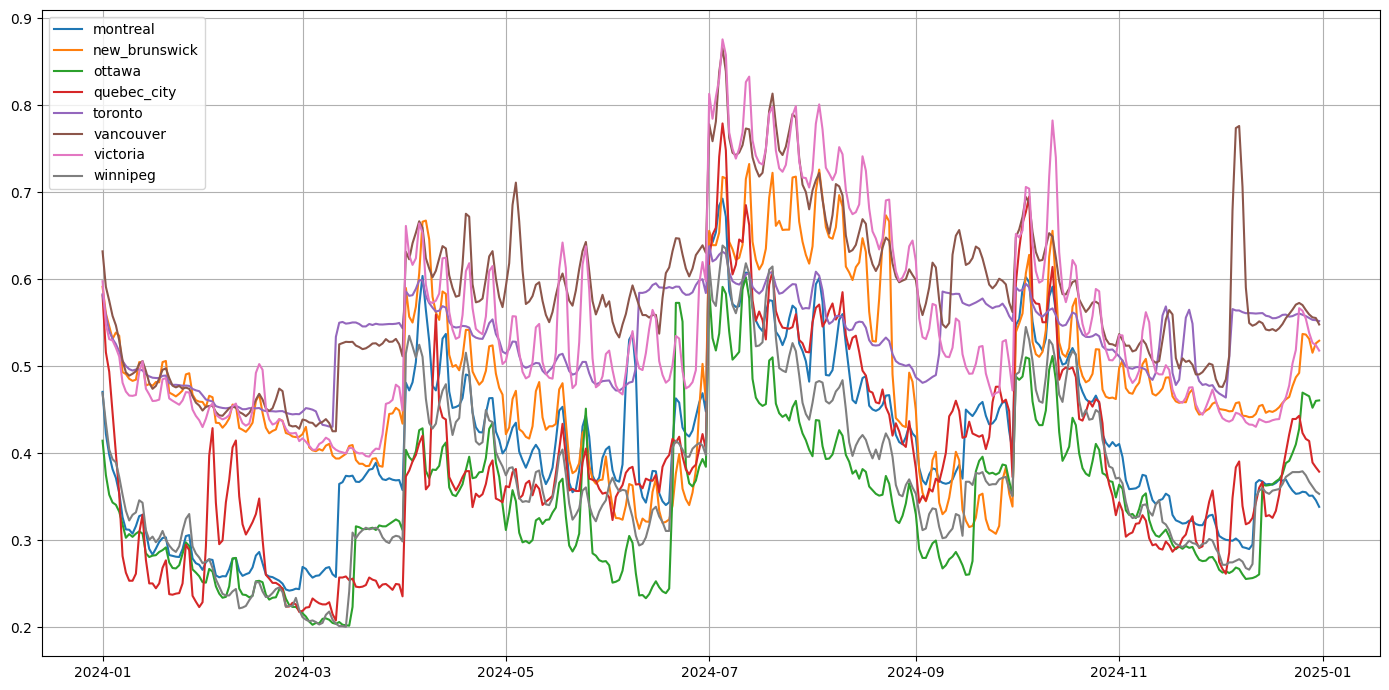

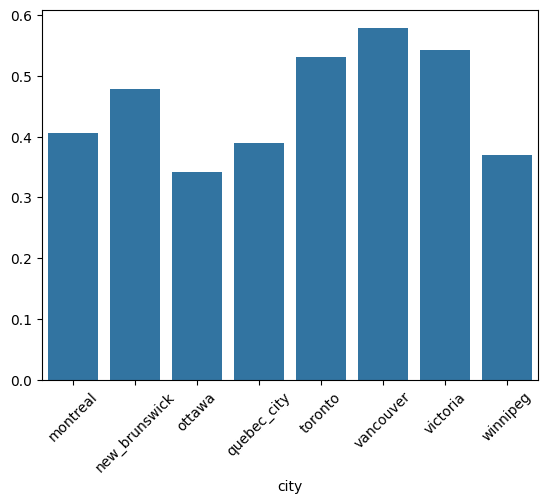

In [ ]:
#1) Analyzing occupancy rate over time
plt.figure(figsize=(14, 7))  # Adjust figure size for better readability
for city in daily_metrics['city'].unique():
    city_data = daily_metrics[daily_metrics['city'] == city]
    plt.plot(city_data.index, city_data['occupancy_rate'], label=city)

plt.legend()
plt.grid(True)
plt.tight_layout()  # Prevents labels from overlapping
plt.show()

#2) Analyzing occupancy rate by city
city_occupancy = daily_metrics.groupby('city')['occupancy_rate'].mean()
sns.barplot(x=city_occupancy.index, y=city_occupancy.values)
plt.xticks(rotation=45)
plt.show()